<a href="https://colab.research.google.com/github/DianaTorres-4/Inteligencia-Artificial/blob/main/Multicapa/Prediccion_de_la_eficiencia_del_combustible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo


En esta linea de codigo instalamos una libreria llamada ucilmlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets


En la primera linea de codigo cargamos el documento y se encarga de buscar y descargar los datos en el dataset

In [ ]:
X.head()


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


pedimos que nos muestre el conjunto de datos X

In [ ]:
y.head()


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


De igual manera pedimos que nos muestre el conjunto de datos y

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


de esta manera en esta linea de codigo pedimos que nos muestre cuantas variaciones nulas tiene  el dataset de x

In [ ]:
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


igualmente en estas lineas de codigo pedimos que nos muestre cuantas variables nulas tiene el dataset ahora y

In [ ]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()


en esta linea de codigo pedimos que nos elimine las variables de los datos que son nulos

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


volvemos a pedir que nos muestre cuantas variables nulas seguimos teniendo

In [ ]:
X = df.drop('mpg', axis=1)
y = df['mpg']


ahora vamos a definir los nuevos conjuntos para la variable x, y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)


vamos a dividir los datos en los conjuntos de prueba y los conjuntos de entrenamiento

In [ ]:
print(X_train.shape)
print(X_test.shape)


(313, 7)
(79, 7)


vamos a pedir que nos muestre la longitud de los conjuntos de entrenamiento y los conjuntos de prueba

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ahora bien ahora pediremos que se escalen los datos para que tengan una media de 0 y una desviacion estandaer de 1

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


vamos a definir la red neuronal y vamos a color que tenemos 4 capas ocultas dentro de ellas en nuestra ultima capa es la capa de salida

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


crearemos un optimizador de nombre adam con una tasa de aprendizaje de 0.001

In [ ]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)


compilaremos el modelo utilizando el optimizador adam y la funcion de perdida error

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 344.4137 - root_mean_squared_error: 18.1251 - val_loss: 25.9142 - val_root_mean_squared_error: 5.0906
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18.0436 - root_mean_squared_error: 4.1950 - val_loss: 12.6788 - val_root_mean_squared_error: 3.5607
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.1840 - root_mean_squared_error: 3.7341 - val_loss: 16.5813 - val_root_mean_squared_error: 4.0720
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.7121 - root_mean_squared_error: 2.9207 - val_loss: 10.8574 - val_root_mean_squared_error: 3.2951
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.3253 - root_mean_squared_error: 3.2094 - val_loss: 11.4518 - val_root_mean_squared_error: 3.3841


entrenamos al modelo con los datos de entrenamiento, debemos de especificar el numero de epocas que queremos que nos muestre

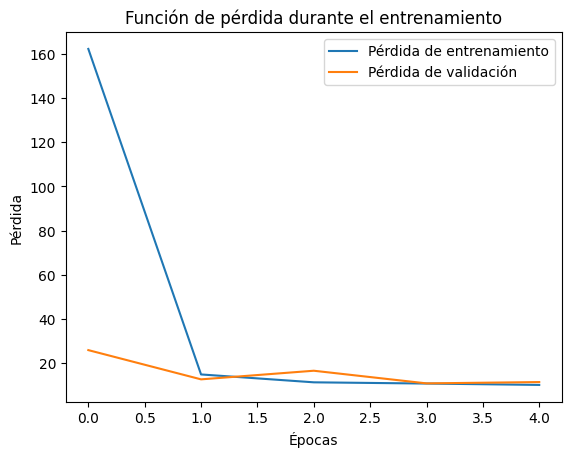

In [ ]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


ahora pediremos que nos muestre en un grafico para que podamos ver si el modelo aprendio o no

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.6631 - root_mean_squared_error: 3.2578
Test Mean Absolute Error: 3.38


evaluaremos al conjunto en un conjunto de prueba

In [ ]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
     Actual  Predicted
82     23.0  24.085546
167    29.0  30.825134
356    32.4  37.263958
120    19.0  17.979563
385    38.0  41.518963


de las predicciones que tenaimos haremos una comparacion de las nuevas predicciones que nos dio ya una vez ejecutando el modelo de prueba

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: 0.8348028461714126
MSE: 11.4518425725828


estas serian otras metricas